## Exploratory analysis of the dependend variables

In [162]:
import pandas as pd 
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [163]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,1,4,2,1,1,0,1,1,1,0
1,Alamada Bia,2,2,4,2,0,2,2,0,4,4,0
2,Alanghate Mfumba,10,1,0,0,0,2,1,0,3,3,0
3,Albat Calabus,10,0,2,0,0,2,2,0,4,4,0
4,Americano Mbunde,19,1,1,2,0,2,2,0,4,4,0


In [164]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

data_frame_combinado_dep_grouped.dropna()


,id,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,Alamada Bia,2.0,2.0,4.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
2,Alanghate Mfumba,10.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,3.0,0.0
3,Albat Calabus,10.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
4,Americano Mbunde,19.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,9.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
125,Viriato Quintunda,12.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,5.0,5.0,2.0
126,Wangna Ntchoba,15.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0
127,Wilndan Tchuda,9.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0


In [165]:
# # Poner lista de las variables. 

# lista Indeg = ['Degree_Rede_EntreajudaLabur' ,'Indeg_Var.Dep_RedeControlExtAusencia'	,'Indeg_Var.Dep_ApoioSpecDiqCint',	'Indeg_Var.Dep_ApoioSpecTubos'	,'Indeg_Var.Dep_RedApoiLevntDiCin',	'Indeg_RedCont_DiqPriqDiqCint'	,'Indeg_RedeRepar_DiqPriqDiqCint',	'Indeg_Red-Val_Cont1Rep2DiqCin'	,'Indeg_Red-Val_Cont1Rep2DiqPrq'	,'Indeg_ContRep2_DiqPrqCin'	,'Indeg_Var.Dep_RedePartilhaAgu']
# lista OutDeg = ['Degree_Rede_EntreajudaLabur', 'OutDeg_Var.Dep_RedeControlExtAusencia',    'OutDeg_Var.Dep_ApoioSpecDiqCint',  'OutDeg_Var.Dep_ApoioSpecTubos',    'OutDeg_Var.Dep_RedApoiLevntDiCin', 'OutDeg_RedCont_DiqPriqDiqCint',    'OutDeg_RedeRepar_DiqPriqDiqCint'   ,'OutDeg_Red-Val_Cont1Rep2DiqCin',  'OutDeg_Red-Val_Cont1Rep2DiqPrq',   'OutDeg_ContRep2_DiqPrqCin',    'OutDeg_Var.Dep_RedePartilhaAgu']


data_for_pca = data_frame_combinado[['Degree_Rede_EntreajudaLabur' ,'Indeg_Var.Dep_RedeControlExtAusencia'	,'Indeg_Var.Dep_ApoioSpecDiqCint',	'Indeg_Var.Dep_ApoioSpecTubos'	,'Indeg_Var.Dep_RedApoiLevntDiCin',	'Indeg_RedCont_DiqPriqDiqCint'	,'Indeg_RedeRepar_DiqPriqDiqCint',	'Indeg_Red-Val_Cont1Rep2DiqCin'	,'Indeg_Red-Val_Cont1Rep2DiqPrq'	,'Indeg_ContRep2_DiqPrqCin'	,'Indeg_Var.Dep_RedePartilhaAgu']] # Estas son las variables
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

        PC1       PC2                id
0 -1.474435  1.847466       Aiace Quior
1 -0.178597  0.714150       Alamada Bia
2 -1.598375 -1.533142  Alanghate Mfumba
3 -0.923421 -1.026519     Albat Calabus
4 -0.505472 -0.594963  Americano Mbunde


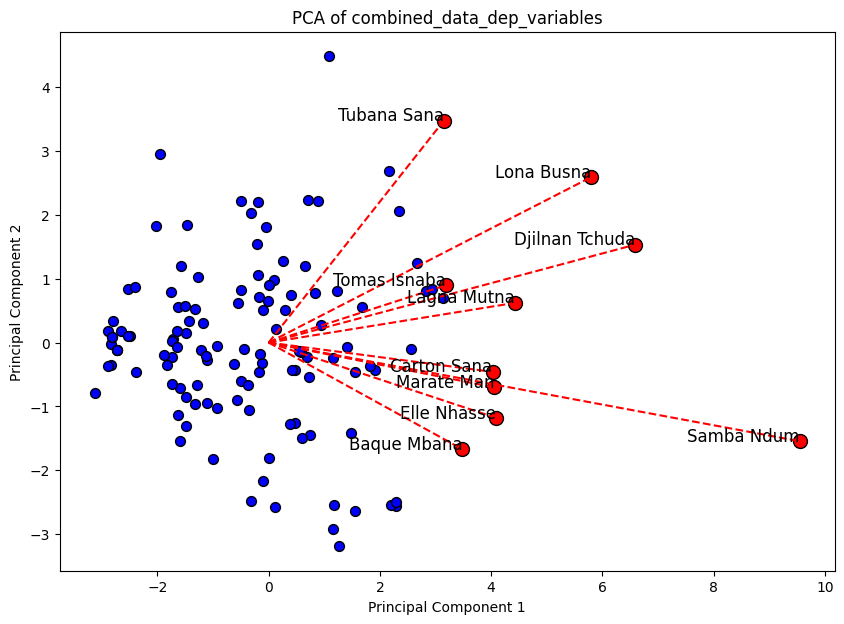

In [166]:

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 10
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_dep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


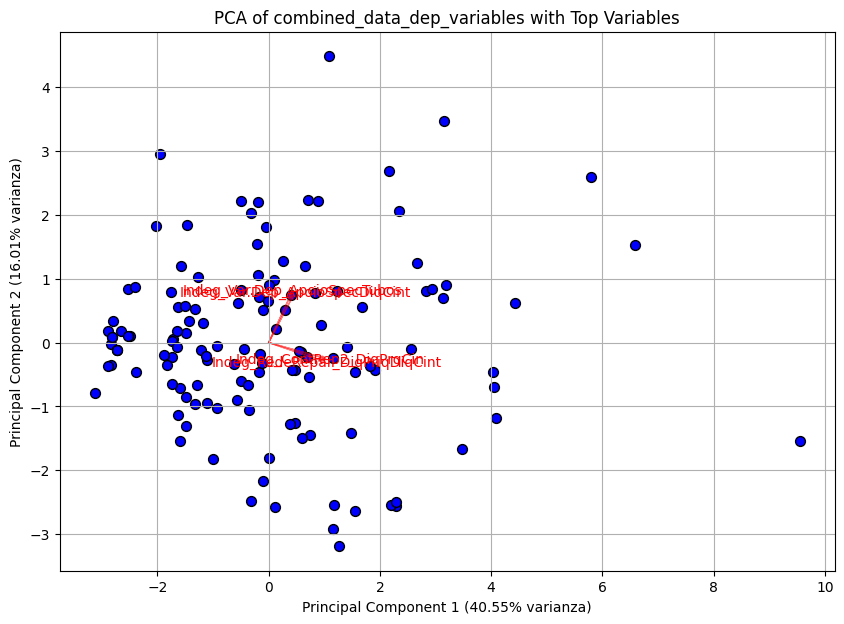

In [167]:

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

explained_var_ratio = pca.explained_variance_ratio_


# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [168]:
data_for_pca.head()

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,Indeg_Var.Dep_RedePartilhaAgu
0,7,1,4,2,1,1,0,1,1,1,0
1,2,2,4,2,0,2,2,0,4,4,0
2,10,1,0,0,0,2,1,0,3,3,0
3,10,0,2,0,0,2,2,0,4,4,0
4,19,1,1,2,0,2,2,0,4,4,0


In [169]:
print(top_vars)

{'Indeg_ContRep2_DiqPrqCin', 'Indeg_Var.Dep_ApoioSpecTubos', 'Indeg_RedeRepar_DiqPriqDiqCint', 'Indeg_Var.Dep_ApoioSpecDiqCint'}


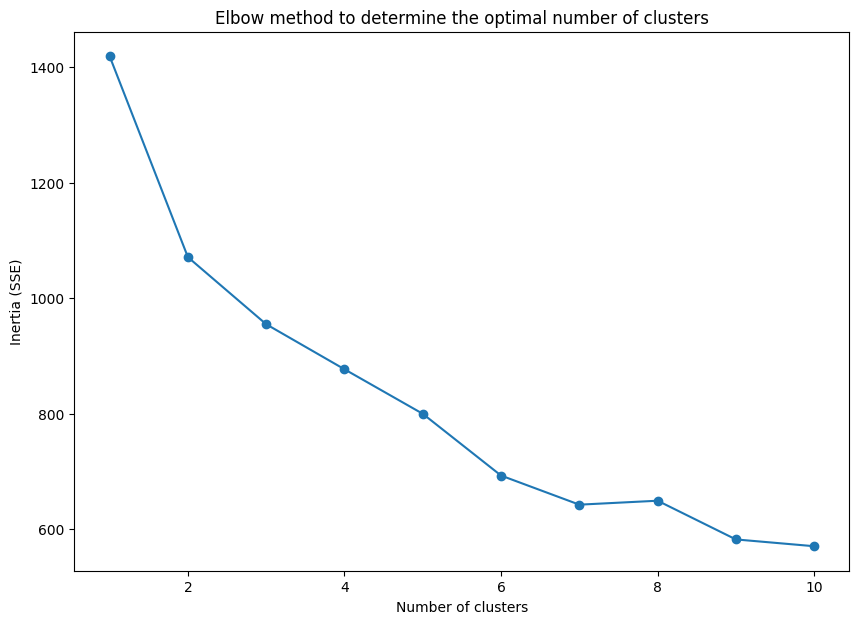

In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'id'
data_for_clustering = data_for_pca

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()


Archivo guardado exitosamente en ../Results/pca_kmeans_results_dep_variables.xlsx.


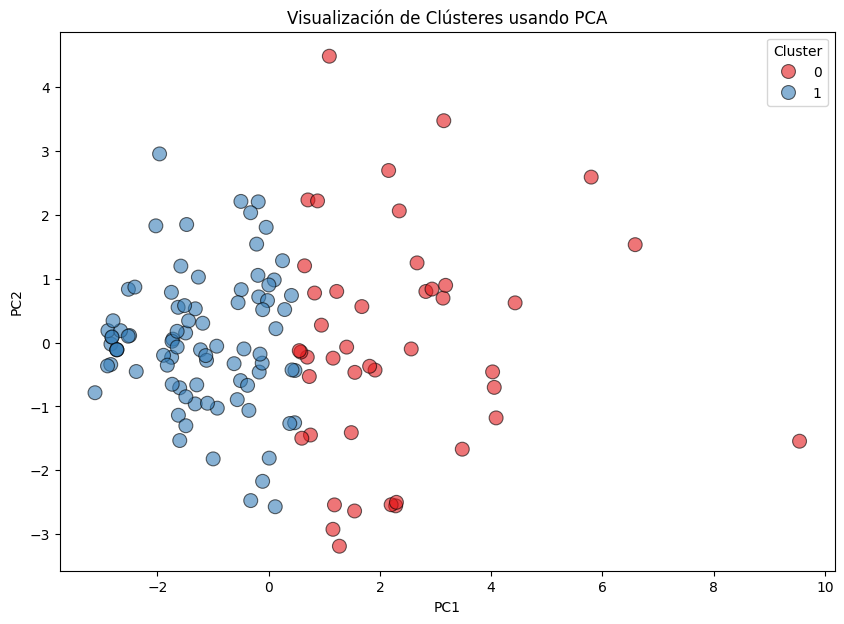

In [171]:
# Aplicar K-Means con el número óptimo de clústeres (elegir k basado en el gráfico del codo)
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_dep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Contar el número de elementos en cada clúster
cluster_counts = data_frame_combinado_dep_grouped['Cluster'].value_counts()

# Definir un umbral para los clústeres pequeños (por ejemplo, menos de 10 elementos)
threshold = 2
small_clusters = cluster_counts[cluster_counts < threshold].index

# Fusionar los clústeres pequeños en un clúster "otros"
data_frame_combinado_dep_grouped['Cluster'] = data_frame_combinado_dep_grouped['Cluster'].apply(lambda x: 'Otros' if x in small_clusters else x)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_dep_grouped['Cluster']

# Exportar los resultados a un archivo Excel
output_path = "../Results/pca_kmeans_results_dep_variables.xlsx"
os.makedirs("../Results/", exist_ok=True)
try:
    with pd.ExcelWriter(output_path) as writer:
        data_frame_combinado_dep_grouped.to_excel(writer, sheet_name='Cluster_Asignations', index=False)
        principal_df.to_excel(writer, sheet_name='PCA_Results', index=False)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

# Graficar los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Visualización de Clústeres usando PCA')
plt.show()

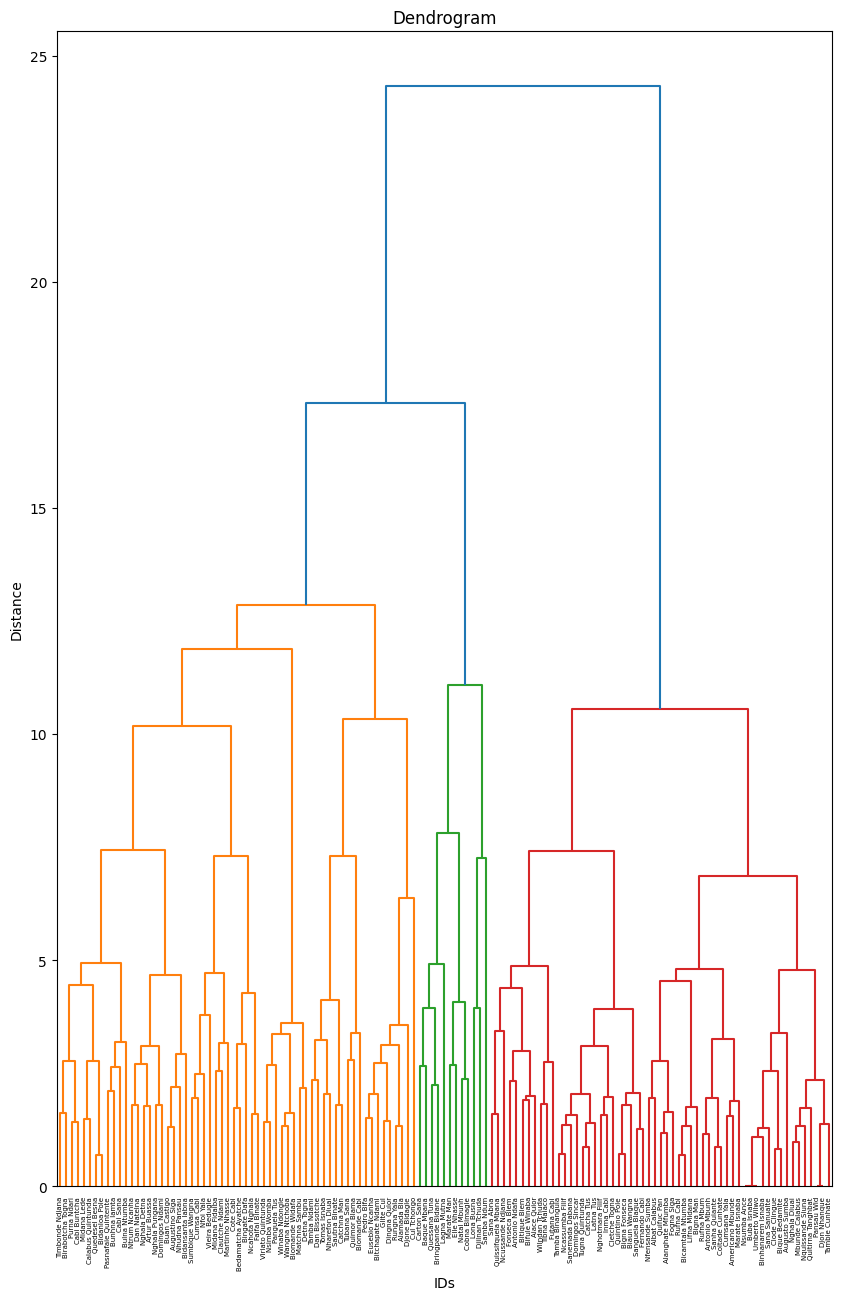

In [172]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular el enlace para el dendrograma utilizando el método 'ward'
linked = linkage(data_scaled, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 15))
dendrogram(linked, orientation='top', labels=data_frame_combinado_dep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Exploratory analysis of independen data

In [173]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [174]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep

,id,Indeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,Indeg_PaiTiopaterC,Indeg_TiosMaternos,Degree_IntimAmigUnd,Indeg_IntimAmigos_,Indeg_RedeRisk_Cen,Indeg_RedeConfianc,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,Aiace Quior,0,0,3,1,2,8,6,3,1,...,Ntchugal,0,0,53,2,1.0,3,3,0,2.3644
1,Alamada Bia,0,0,0,0,0,4,1,0,1,...,Fanhi,0,0,37,2,1.0,1,0,0,0.5087
2,Alanghate Mfumba,0,0,0,0,2,3,2,0,0,...,Bsoran,0,0,25,1,1.0,4,3,1,1.4640
3,Albat Calabus,0,0,0,0,0,6,2,0,0,...,Bsoran,1,0,48,2,2.0,4,3,0,1.5186
4,Americano Mbunde,0,0,2,0,0,1,1,0,0,...,Fanhi,0,0,30,1,1.0,2,1,0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,3,3,0,0,0,9,7,7,5,...,Ntchugal,1,0,52,2,2.0,4,16,1,4.7238
125,Viriato Quintunda,0,0,4,1,0,12,8,9,1,...,Ntchugal,1,0,51,2,3.0,2,7,0,5.3823
126,Wangna Ntchoba,0,0,0,0,0,3,2,4,0,...,Ntchugal,1,0,78,3,2.0,1,1,0,2.9833
127,Wilndan Tchuda,0,0,0,0,0,4,0,2,2,...,Ntchugal,1,0,52,2,1.0,4,3,0,1.3262


In [175]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])

# Ahora las columnas '1_VarExp_Moranca' y '2_VarExp_Atri_Tabanca' están transformadas a números
print(data_frame_combinado_indep.head())

                 id  Indeg_RedConfltAgu  Degree_RedConfliAgu  \
0       Aiace Quior                   0                    0   
1       Alamada Bia                   0                    0   
2  Alanghate Mfumba                   0                    0   
3     Albat Calabus                   0                    0   
4  Americano Mbunde                   0                    0   

   Degree_RedeIrmonsPr  Indeg_PaiTiopaterC  Indeg_TiosMaternos  \
0                    3                   1                   2   
1                    0                   0                   0   
2                    0                   0                   2   
3                    0                   0                   0   
4                    2                   0                   0   

   Degree_IntimAmigUnd  Indeg_IntimAmigos_  Indeg_RedeRisk_Cen  \
0                    8                   6                   3   
1                    4                   1                   0   
2                   

In [176]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])
data_for_pca = data_for_pca[['Indeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
 'Indeg_PaiTiopaterC','Indeg_TiosMaternos','Degree_IntimAmigUnd', 
'Indeg_IntimAmigos_','Indeg_RedeRisk_Cen','Indeg_RedeConfianc',
'Degree_RedeConflitA','Degree_RedeConflitG','Indeg_VendaParcela',
'Indeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro',
'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
'2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
'5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
'8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]

# data_for_pca = data_for_pca[['OutDeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
#  'OutDeg_PaiTiopaterC','OutDeg_TiosMaternos','Degree_IntimAmigUnd',
# 'OutDeg_IntimAmigos_','OutDeg_RedeRisk_Cen','OutDeg_RedeConfianc',
# 'Degree_RedeConflitA','Degree_RedeConflitG','OutDeg_VendaParcela',
# 'OutDeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro',
# 'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
# '2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
# '5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
# '8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]


# data_for_pca = data_for_pca[['Indeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
#  'Indeg_PaiTiopaterC','Indeg_TiosMaternos','Degree_IntimAmigUnd',
# 'Indeg_IntimAmigos_','Indeg_RedeRisk_Cen','Indeg_RedeConfianc',
# 'Degree_RedeConflitA','Degree_RedeConflitG','Indeg_VendaParcela',
# 'Indeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro','Data_area',
# 'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
# '2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
# '5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
# '8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]


data_for_pca

,Indeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,Indeg_PaiTiopaterC,Indeg_TiosMaternos,Degree_IntimAmigUnd,Indeg_IntimAmigos_,Indeg_RedeRisk_Cen,Indeg_RedeConfianc,Degree_RedeConflitA,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,0.0,0.0,3.0,1.0,2.0,8.0,6.0,3.0,1.0,0.0,...,2.0,0.0,0.0,53.0,2.0,1.0,3.0,3.0,0.0,2.3644
1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,37.0,2.0,1.0,1.0,0.0,0.0,0.5087
2,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,1.0,1.0,4.0,3.0,1.0,1.4640
3,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,48.0,2.0,2.0,4.0,3.0,0.0,1.5186
4,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,30.0,1.0,1.0,2.0,1.0,0.0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3.0,3.0,0.0,0.0,0.0,9.0,7.0,7.0,5.0,0.0,...,2.0,1.0,0.0,52.0,2.0,2.0,4.0,16.0,1.0,4.7238
125,0.0,0.0,4.0,1.0,0.0,12.0,8.0,9.0,1.0,0.0,...,2.0,1.0,0.0,51.0,2.0,3.0,2.0,7.0,0.0,5.3823
126,0.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,...,2.0,1.0,0.0,78.0,3.0,2.0,1.0,1.0,0.0,2.9833
127,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,...,2.0,1.0,0.0,52.0,2.0,1.0,4.0,3.0,0.0,1.3262


        PC1       PC2                id
0  0.190861  0.365906       Aiace Quior
1 -2.506780 -0.790546       Alamada Bia
2 -2.109111 -1.568191  Alanghate Mfumba
3 -1.632773  1.390017     Albat Calabus
4 -2.329312 -1.748739  Americano Mbunde


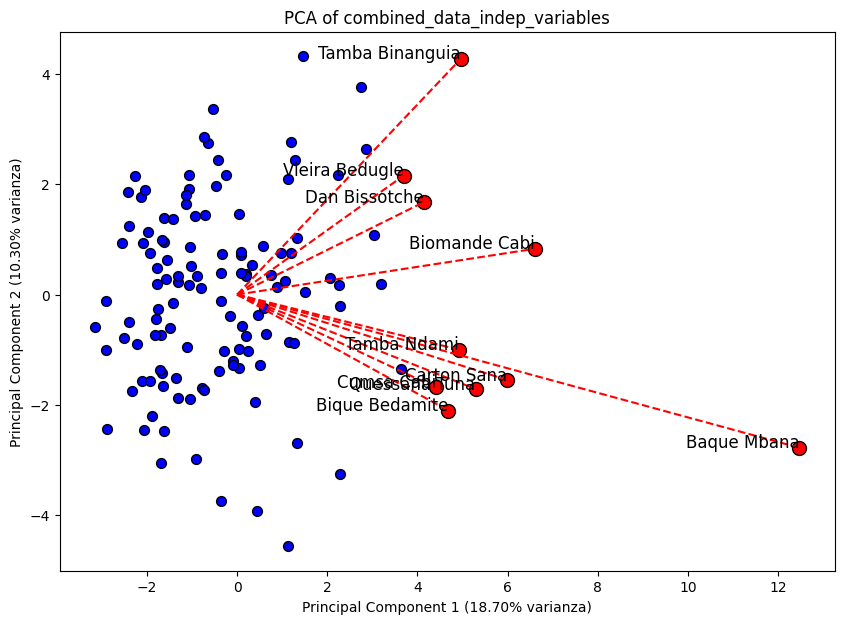

In [177]:

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 10
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)
explained_var_ratio = pca.explained_variance_ratio_


# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')

plt.grid(False)
plt.show()

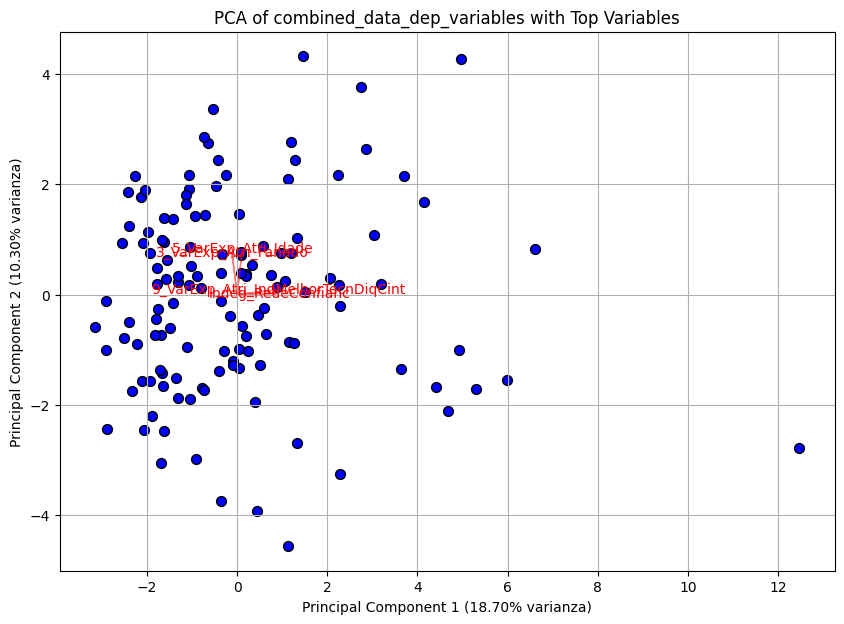

In [178]:
# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [179]:
print(top_vars)

{'3_VarExp_Atri_Fanado', '5_VarExp_Atri_Idade', 'Indeg_RedeConfianc', '9_VarExp_Atri_IndMelhorTecnDiqCint'}


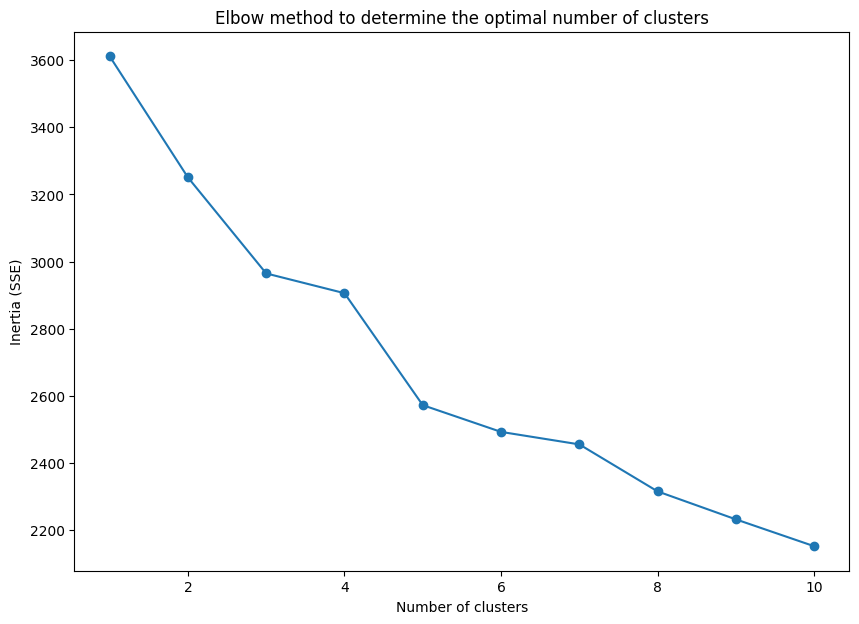

In [180]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'id'
data_for_clustering = data_frame_combinado_indep_grouped.drop(columns=['id'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()



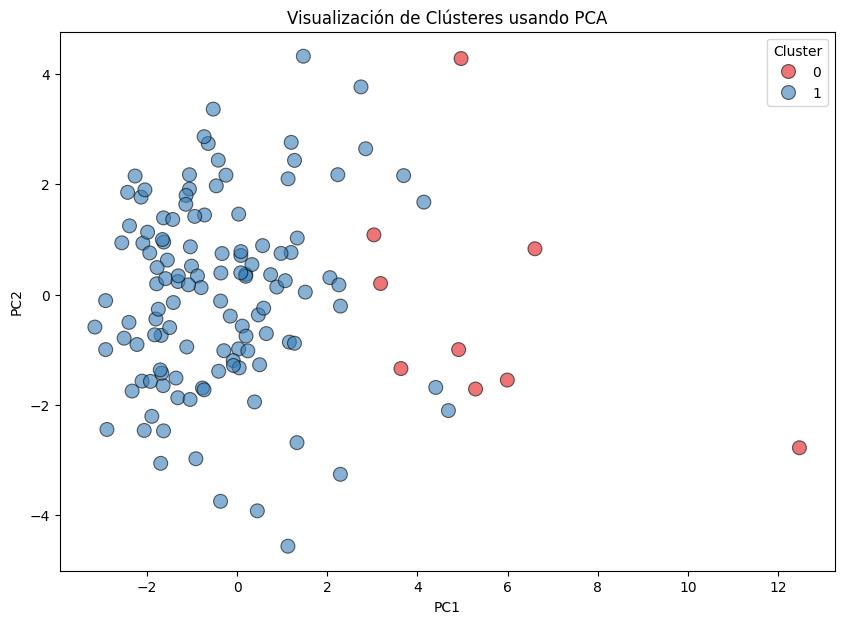

Archivo guardado exitosamente en ../Results/pca_kmeans_results_indep_variables.xlsx.


In [181]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Aplicar K-Means con el número óptimo de clústeres
optimal_k = 2  # Reemplaza este valor con el número óptimo que determines del gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_indep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Contar el número de elementos en cada clúster
cluster_counts = data_frame_combinado_indep_grouped['Cluster'].value_counts()

# Definir un umbral para los clústeres pequeños (por ejemplo, menos de 2 elementos)
threshold = 2
small_clusters = cluster_counts[cluster_counts < threshold].index

# Fusionar los clústeres pequeños en un clúster "otros"
data_frame_combinado_indep_grouped['Cluster'] = data_frame_combinado_indep_grouped['Cluster'].apply(lambda x: 'Otros' if x in small_clusters else x)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_indep_grouped['Cluster']

# Graficar los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Visualización de Clústeres usando PCA')
plt.show()

# Exportar los resultados a un archivo Excel
output_path = "../Results/pca_kmeans_results_indep_variables.xlsx"
os.makedirs("../Results/", exist_ok=True)
try:
    with pd.ExcelWriter(output_path) as writer:
        data_frame_combinado_indep_grouped.to_excel(writer, sheet_name='Cluster_Asignations', index=False)
        principal_df.to_excel(writer, sheet_name='PCA_Results', index=False)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

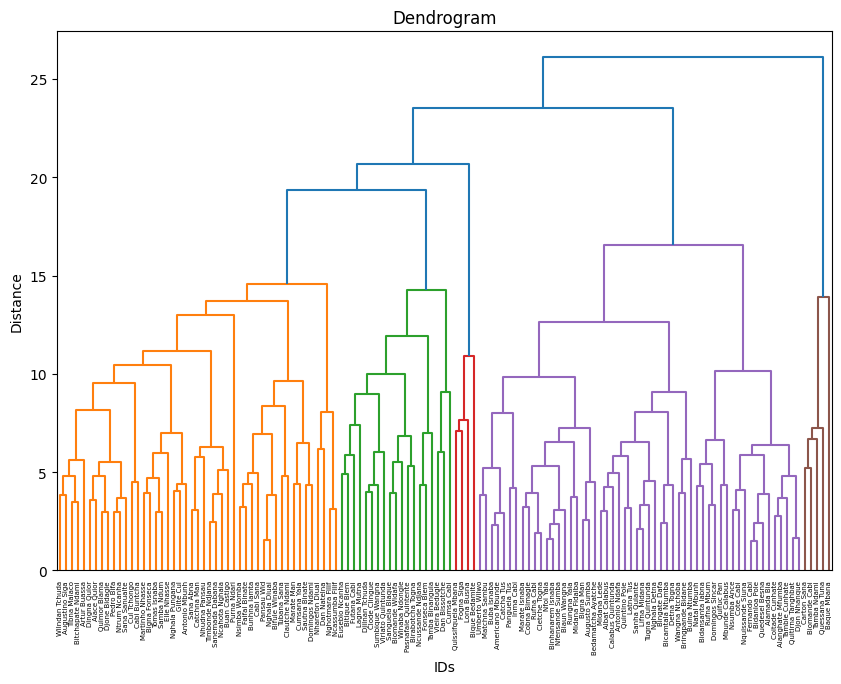

In [182]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular el enlace para el dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data_frame_combinado_indep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Plots de las variables dependientes

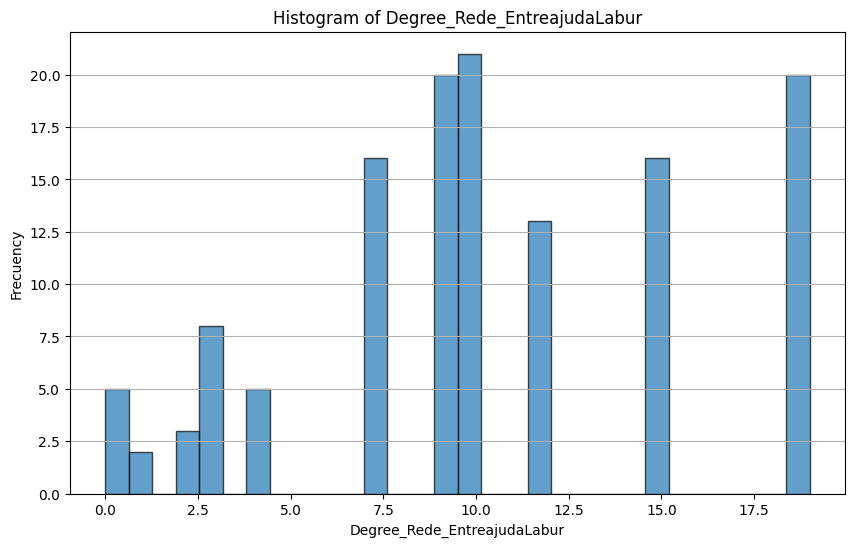

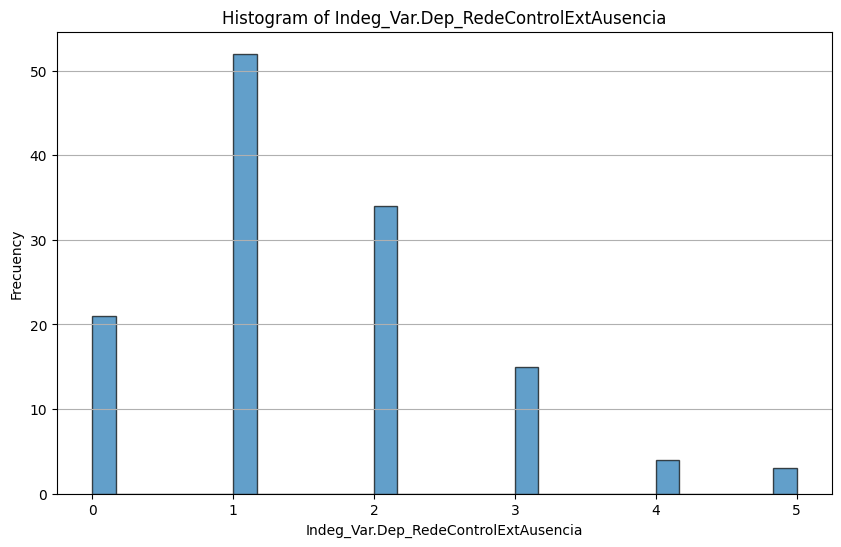

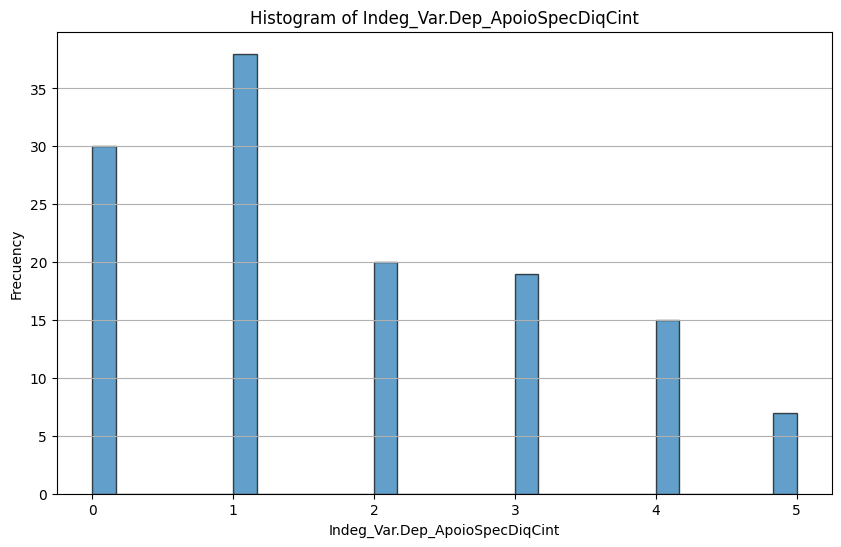

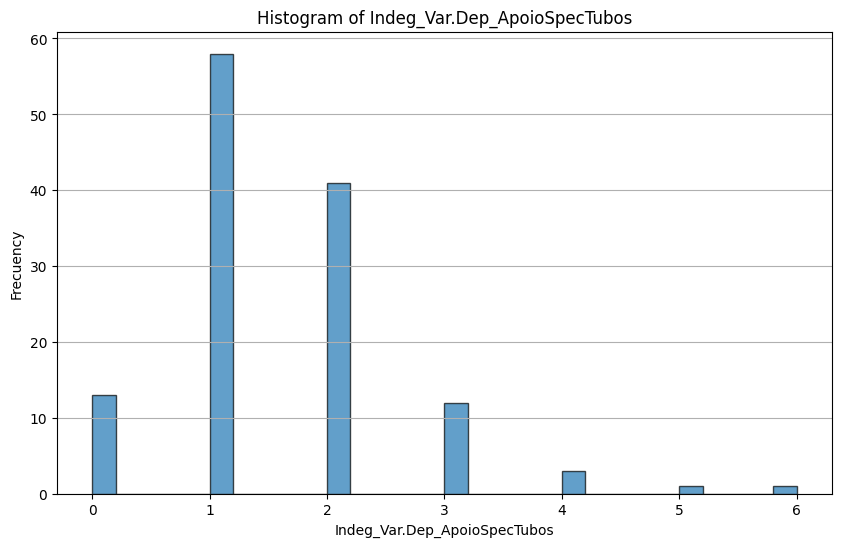

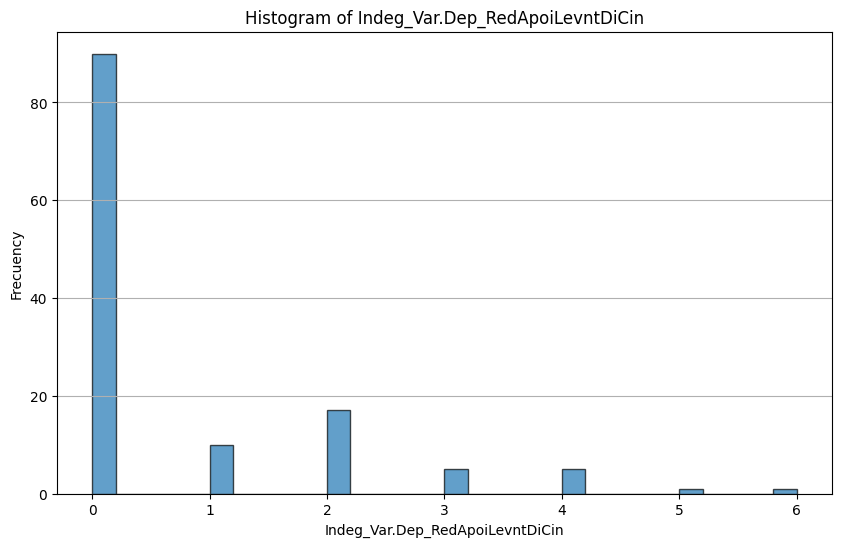

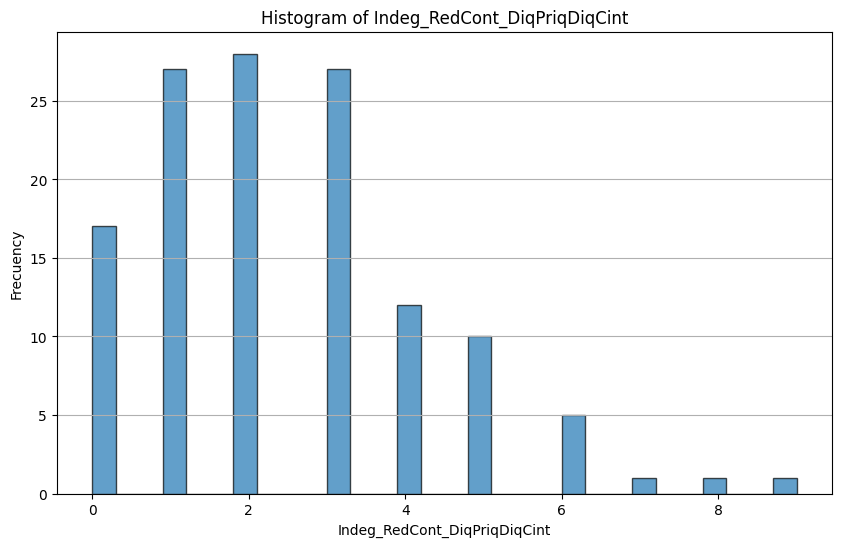

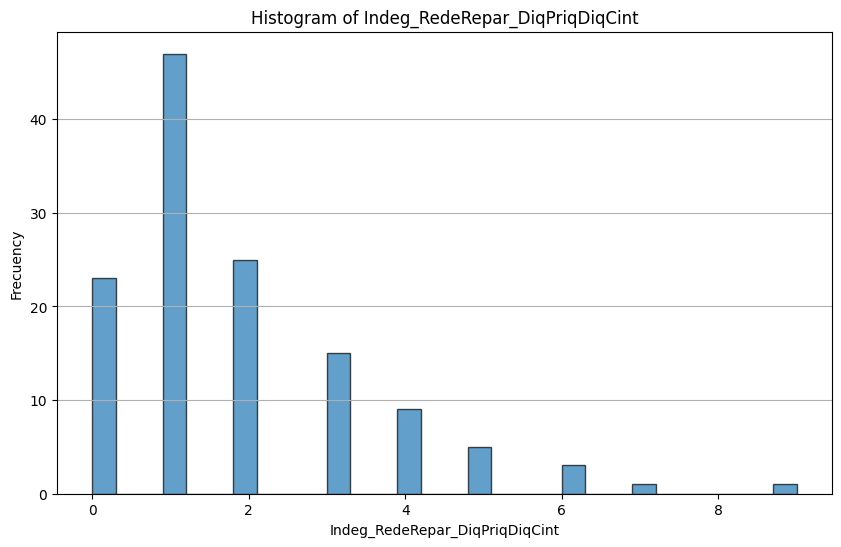

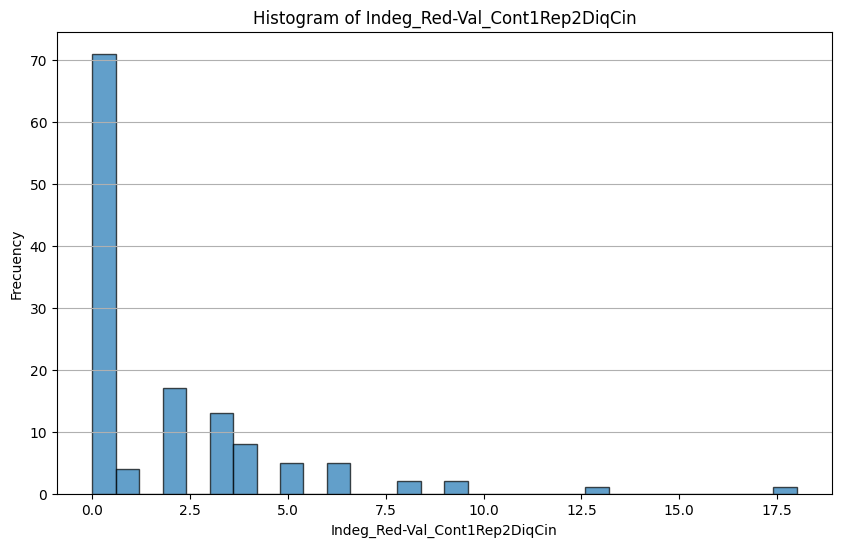

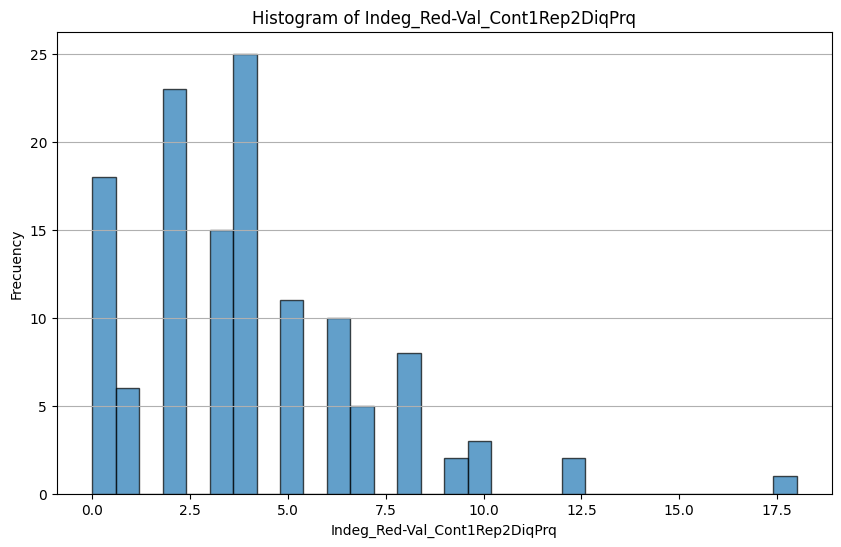

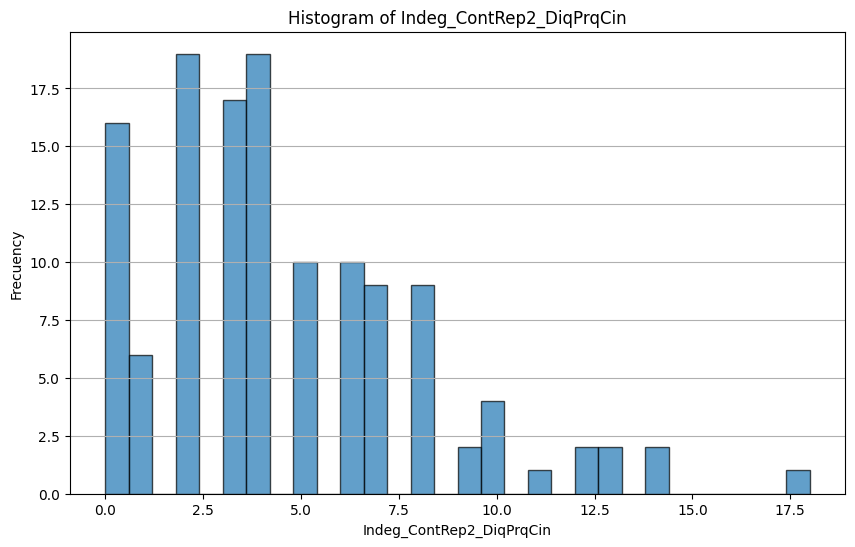

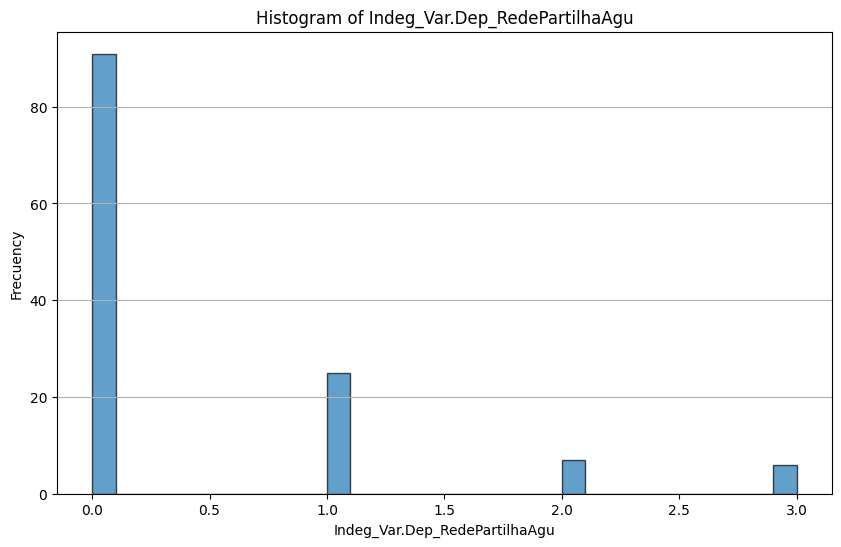

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Excluir la columna 'id'
dep_vars_df = data_frame_combinado.drop(columns=['id'])

# Seleccionar la cantidad de variables que deseas plotear
num_plots = 12  # Hermano, acá debe elegir cuántos plots quiere. Debe tener cuidado si pone muchos, se plotean todos. 

# Crear histogramas para cada variable dependiente seleccionada y guardarlos
selected_columns = dep_vars_df.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.grid(axis='y')
    #plt.savefig(f'../DataIntermediate/histogram_{col}.png') # Si quiere guardar el plot, borra el primer # de esta fila.
    plt.show()


## Plots de las variables independientes

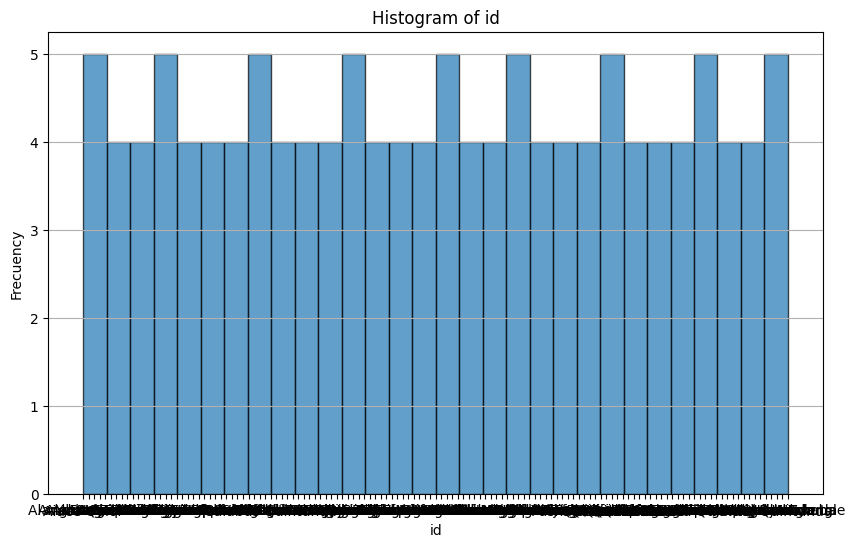

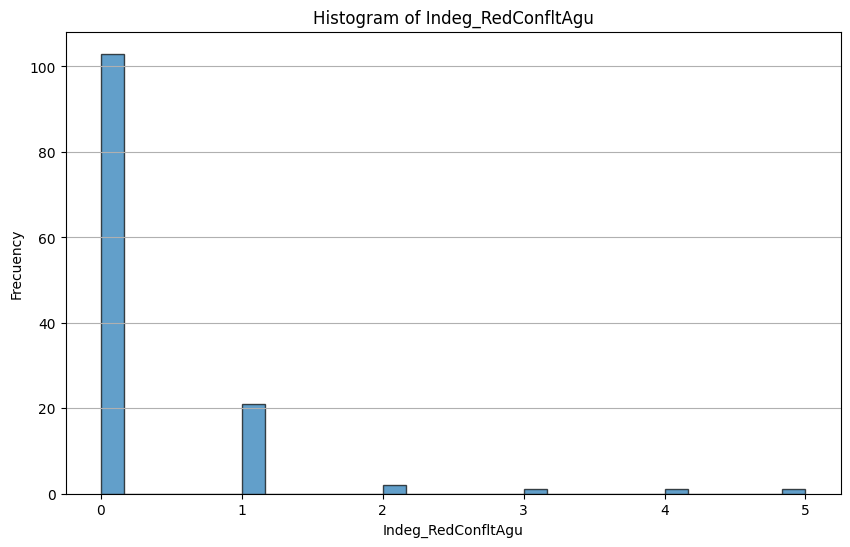

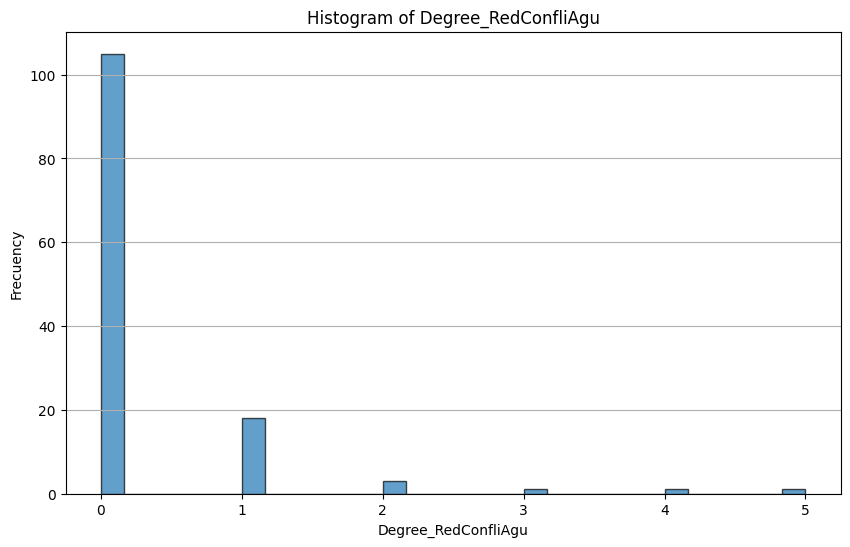

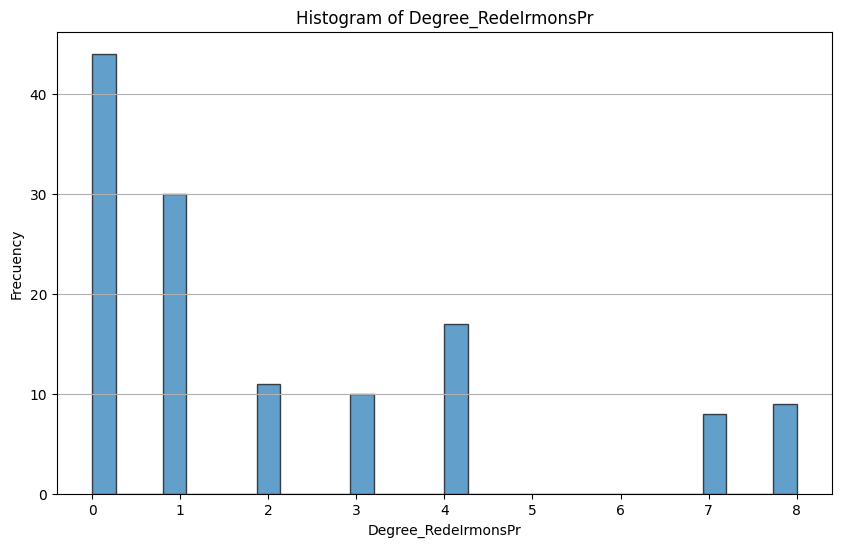

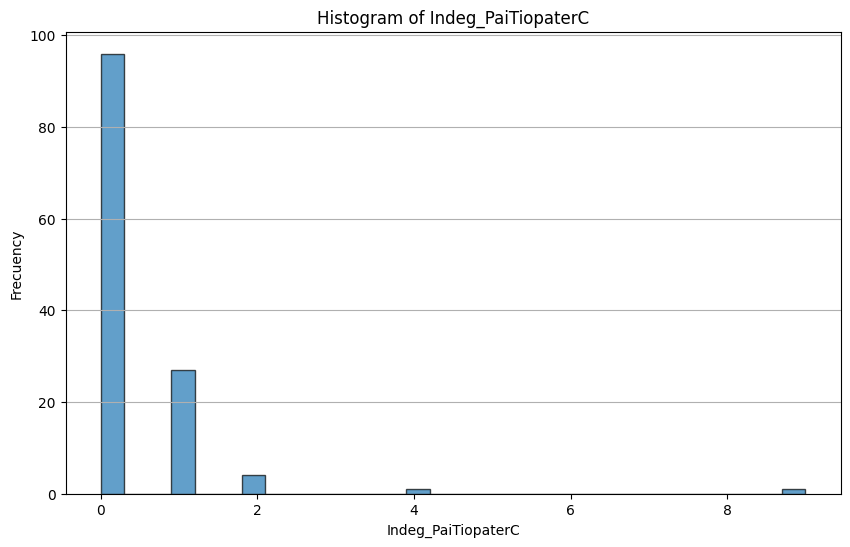

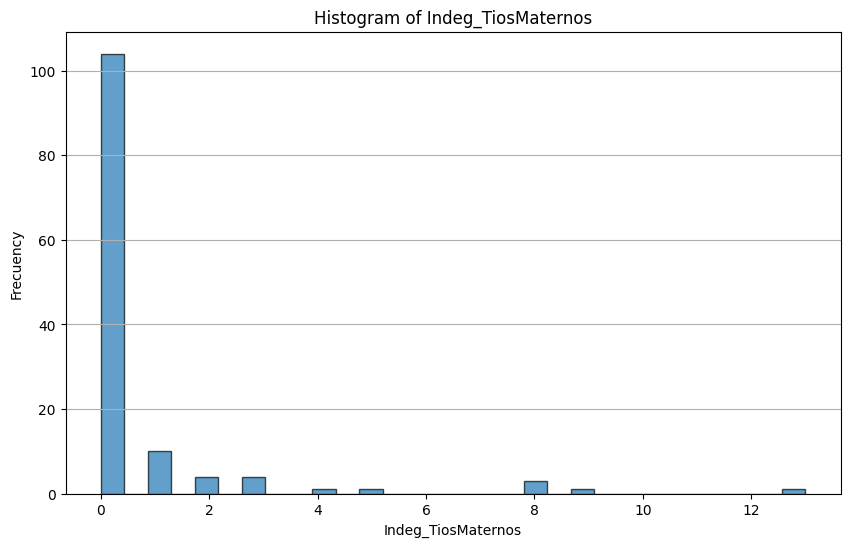

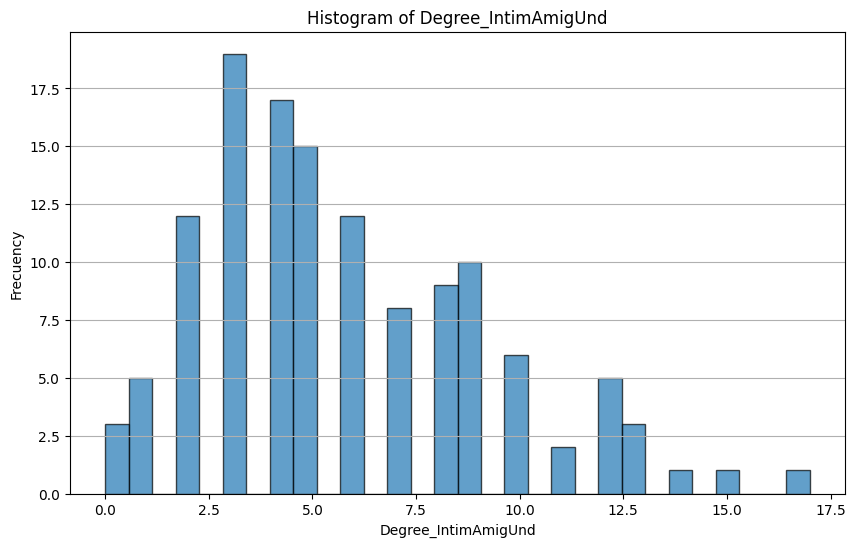

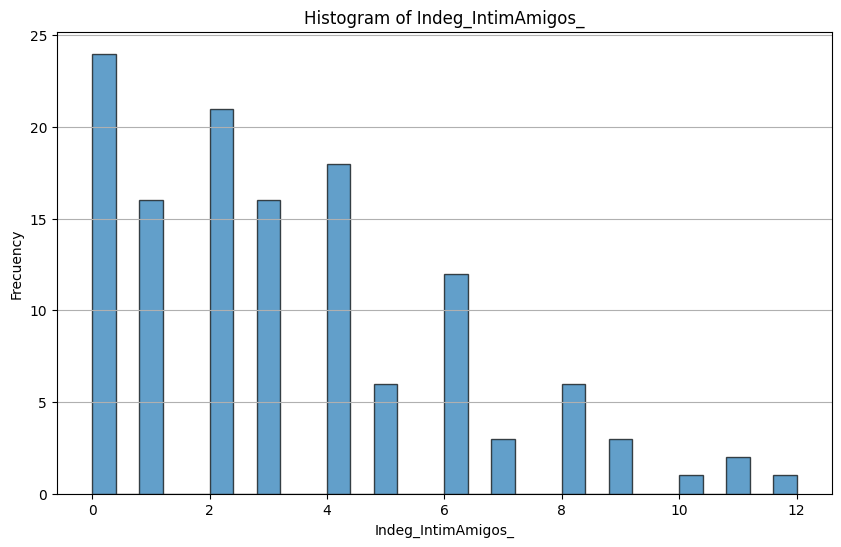

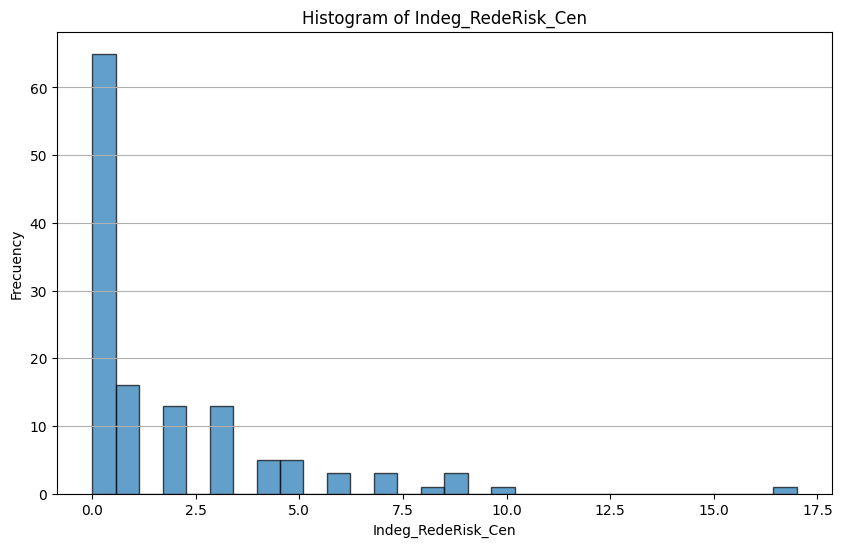

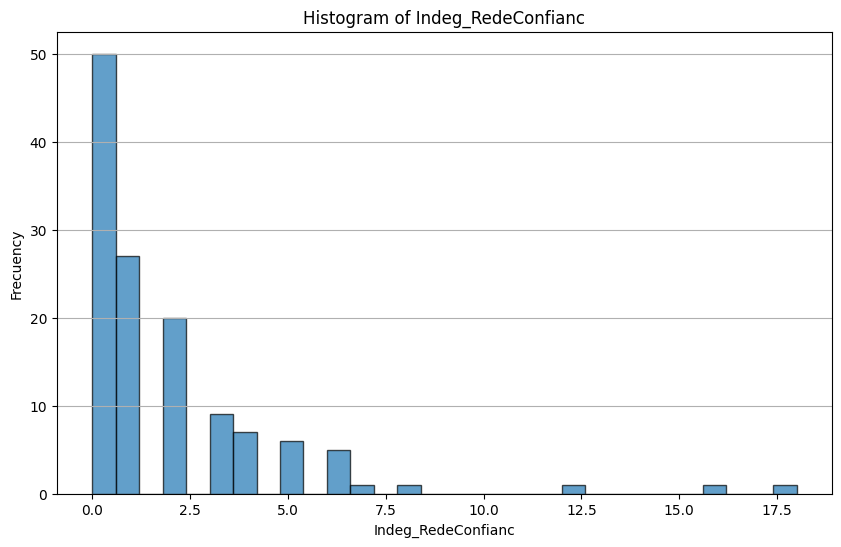

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Excluir la columna 'id'
dep_vars_df_indep = data_frame_combinado_indep

# Seleccionar la cantidad de variables que deseas plotear
num_plots = 10  # Hermano, acá debe elegir cuántos plots quiere. Debe tener cuidado si pone muchos, se plotean todos. 

# Crear histogramas para cada variable dependiente seleccionada y guardarlos
selected_columns = dep_vars_df_indep.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df_indep[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # Si quiere guardar el plot, borra el primer # de esta fila.
    plt.show()


## Correlation between the variables

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los DataFrames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',')
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',')



In [186]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])




In [187]:
 #Eliminar la columna 'id' si está presente
data_frame_combinado_indep = data_frame_combinado_indep.drop(columns=['id'], errors='ignore')
data_frame_combinado_dep = data_frame_combinado_dep.drop(columns=['id'], errors='ignore')

# Calcular la matriz de correlación entre todas las variables
combined_df = pd.concat([data_frame_combinado_dep, data_frame_combinado_indep], axis=1)


In [188]:
data_frame_combinado_indep

,Indeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,Indeg_PaiTiopaterC,Indeg_TiosMaternos,Degree_IntimAmigUnd,Indeg_IntimAmigos_,Indeg_RedeRisk_Cen,Indeg_RedeConfianc,Degree_RedeConflitA,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,0,0,3,1,2,8,6,3,1,0,...,2,0,0,53,2,1.0,3,3,0,2.3644
1,0,0,0,0,0,4,1,0,1,0,...,1,0,0,37,2,1.0,1,0,0,0.5087
2,0,0,0,0,2,3,2,0,0,0,...,0,0,0,25,1,1.0,4,3,1,1.4640
3,0,0,0,0,0,6,2,0,0,0,...,0,1,0,48,2,2.0,4,3,0,1.5186
4,0,0,2,0,0,1,1,0,0,0,...,1,0,0,30,1,1.0,2,1,0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3,3,0,0,0,9,7,7,5,0,...,2,1,0,52,2,2.0,4,16,1,4.7238
125,0,0,4,1,0,12,8,9,1,0,...,2,1,0,51,2,3.0,2,7,0,5.3823
126,0,0,0,0,0,3,2,4,0,0,...,2,1,0,78,3,2.0,1,1,0,2.9833
127,0,0,0,0,0,4,0,2,2,0,...,2,1,0,52,2,1.0,4,3,0,1.3262


In [189]:
print(data_frame_combinado_dep)

     Degree_Rede_EntreajudaLabur  Indeg_Var.Dep_RedeControlExtAusencia  \
0                              7                                     1   
1                              2                                     2   
2                             10                                     1   
3                             10                                     0   
4                             19                                     1   
..                           ...                                   ...   
124                            9                                     4   
125                           12                                     1   
126                           15                                     0   
127                            9                                     1   
128                            9                                     0   

     Indeg_Var.Dep_ApoioSpecDiqCint  Indeg_Var.Dep_ApoioSpecTubos  \
0                                 4       

In [190]:
combined_df.head()

,Degree_Rede_EntreajudaLabur,Indeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_RedApoiLevntDiCin,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqPrq,Indeg_ContRep2_DiqPrqCin,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,7,1,4,2,1,1,0,1,1,1,...,2,0,0,53,2,1.0,3,3,0,2.3644
1,2,2,4,2,0,2,2,0,4,4,...,1,0,0,37,2,1.0,1,0,0,0.5087
2,10,1,0,0,0,2,1,0,3,3,...,0,0,0,25,1,1.0,4,3,1,1.4640
3,10,0,2,0,0,2,2,0,4,4,...,0,1,0,48,2,2.0,4,3,0,1.5186
4,19,1,1,2,0,2,2,0,4,4,...,1,0,0,30,1,1.0,2,1,0,0.2500


In [191]:
corr_matrix = combined_df.corr()

# Extraer solo las correlaciones entre variables dependientes e independientes
corr_dep_indep = corr_matrix.loc[data_frame_combinado_dep.columns, data_frame_combinado_indep.columns]

output_path = "../Results/correlations_all.csv"
os.makedirs("../Results/", exist_ok=True)
corr_dep_indep.to_csv(output_path, index=True)

print(corr_dep_indep)

                                      Indeg_RedConfltAgu  Degree_RedConfliAgu  \
Degree_Rede_EntreajudaLabur                     0.051096             0.039260   
Indeg_Var.Dep_RedeControlExtAusencia            0.214997             0.208093   
Indeg_Var.Dep_ApoioSpecDiqCint                  0.098965             0.110286   
Indeg_Var.Dep_ApoioSpecTubos                    0.020233             0.004840   
Indeg_Var.Dep_RedApoiLevntDiCin                 0.018636            -0.000980   
Indeg_RedCont_DiqPriqDiqCint                    0.125475             0.103446   
Indeg_RedeRepar_DiqPriqDiqCint                  0.077319             0.056339   
Indeg_Red-Val_Cont1Rep2DiqCin                   0.043312             0.000352   
Indeg_Red-Val_Cont1Rep2DiqPrq                   0.090097             0.092194   
Indeg_ContRep2_DiqPrqCin                        0.129091             0.102036   
Indeg_Var.Dep_RedePartilhaAgu                   0.088919             0.093759   

                           

In [192]:
# Umbral de correlación
threshold = 0.10

# Filtrar las correlaciones absolutas mayores al umbral y convertir a un DataFrame largo (long format)
high_corr = corr_dep_indep[corr_dep_indep.abs() > threshold].stack().reset_index()
high_corr.columns = ['Variable Dependiente', 'Variable Independiente', 'Correlación']

# Ordenar por la magnitud de la correlación
high_corr = high_corr.reindex(high_corr['Correlación'].abs().sort_values(ascending=False).index)

print("DataFrame con las correlaciones más altas:")
high_corr.head(130)



DataFrame con las correlaciones más altas:


,Variable Dependiente,Variable Independiente,Correlación
59,Indeg_Var.Dep_RedApoiLevntDiCin,2_VarExp_Atri_Tabanca,0.401413
102,Indeg_Red-Val_Cont1Rep2DiqCin,Indeg_RedeConfianc,0.401082
33,Indeg_Var.Dep_ApoioSpecDiqCint,2_VarExp_Atri_Tabanca,0.383919
73,Indeg_RedCont_DiqPriqDiqCint,PC1_Distance_Pro,-0.377677
157,Indeg_Var.Dep_RedePartilhaAgu,Indeg_RedeRisk_Cen,0.366417
...,...,...,...
30,Indeg_Var.Dep_ApoioSpecDiqCint,Avg_Distancia_Dist_moranza,-0.127134
60,Indeg_Var.Dep_RedApoiLevntDiCin,3_VarExp_Atri_Fanado,-0.125919
65,Indeg_RedCont_DiqPriqDiqCint,Indeg_RedConfltAgu,0.125475
86,Indeg_RedeRepar_DiqPriqDiqCint,Degree_RedeConflitG,0.124629


Archivo guardado exitosamente en ../Results/correlations_10.csv.


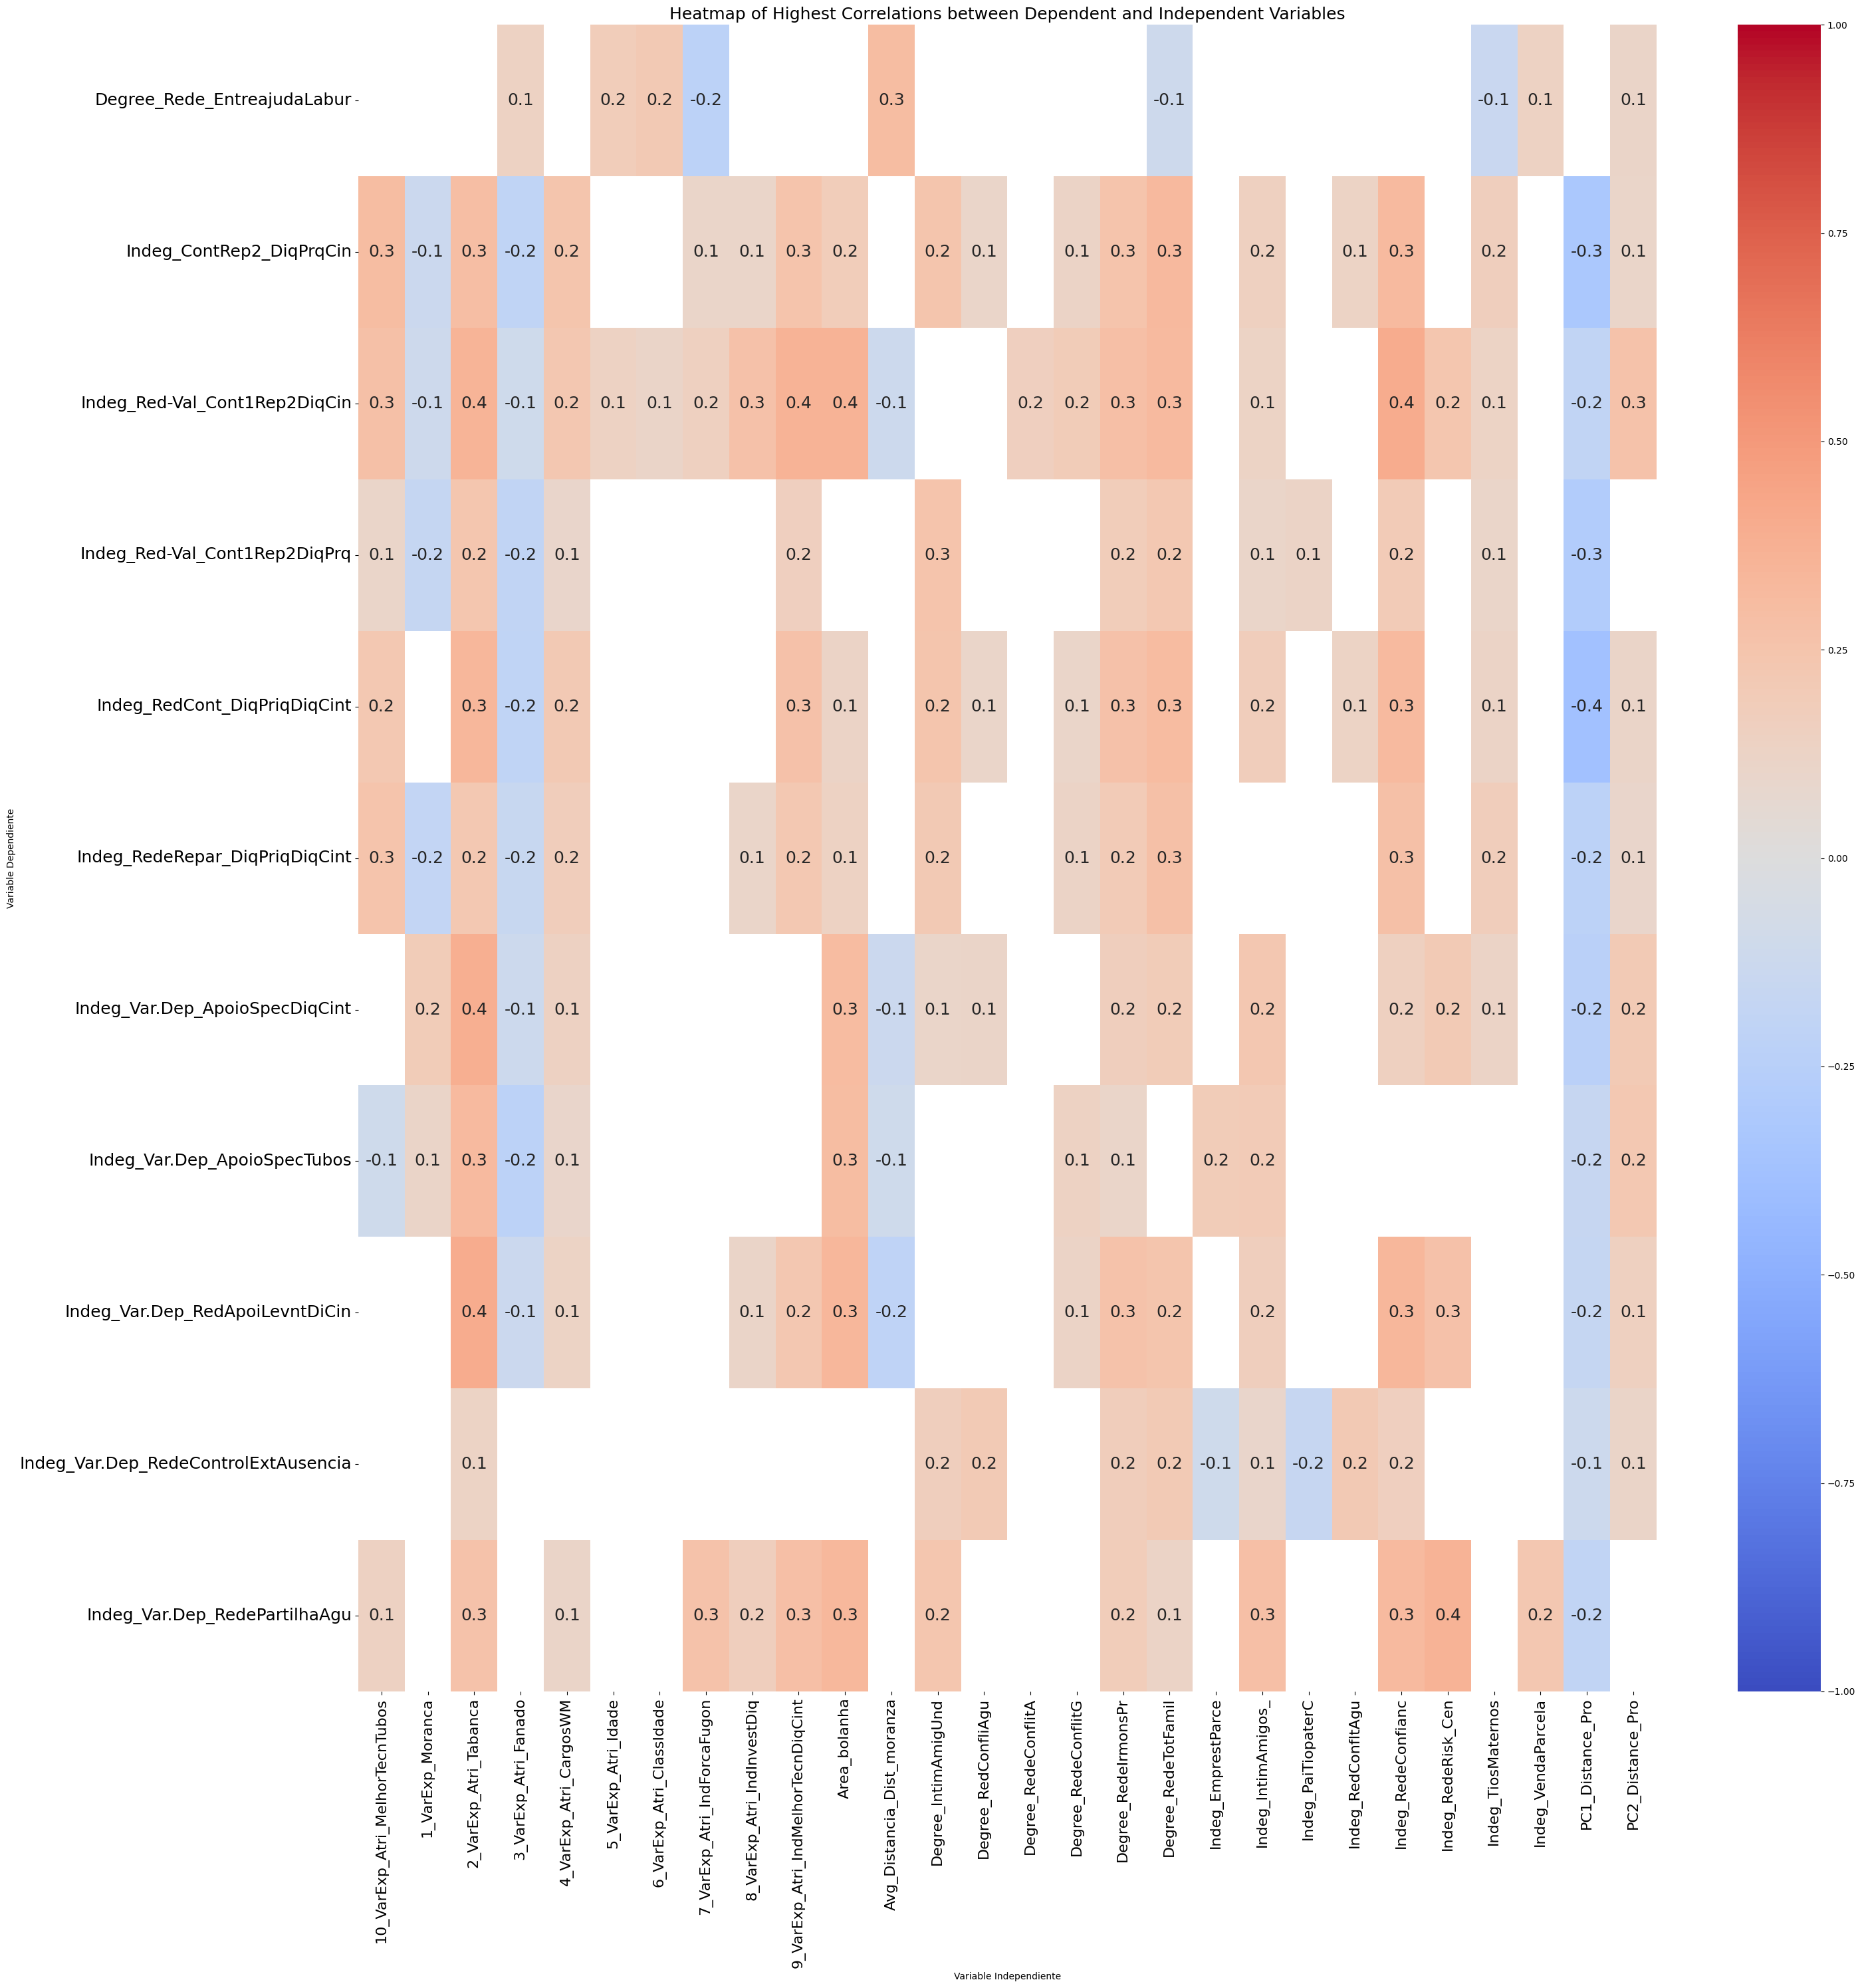

In [193]:
# Crear un DataFrame pivotado de high_corr
high_corr_pivot = high_corr.pivot_table(index='Variable Dependiente', columns='Variable Independiente', values='Correlación')

# Guardar el DataFrame pivotado en un archivo CSV
output_path = "../Results/correlations_10.csv"
os.makedirs("../Results/", exist_ok=True)
try:
    high_corr_pivot.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

# Ajustar el tamaño de la figura y el tamaño de la fuente
plt.figure(figsize=(30, 30))  # Aumentar el tamaño de la figura
sns.heatmap(high_corr_pivot, annot=True, fmt='.1f', cmap='coolwarm', center=0, vmin=-1, vmax=1, annot_kws={"size": 18})
plt.title('Heatmap of Highest Correlations between Dependent and Independent Variables', fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=18)
plt.tight_layout()  # Ajustar el layout para que no se recorten las etiquetas
plt.show()